In [2]:
import numpy as np
import csv
from scipy.special import comb
import matplotlib.pyplot as plt

In [4]:
trainX = np.loadtxt(open("data/X_train.csv", "r"), delimiter = ",")
testX = np.loadtxt(open("data/X_test.csv", "r"), delimiter = ",")
trainY = np.loadtxt(open("data/label_train.csv", "r"), delimiter = ",")
testY = np.loadtxt(open("data/label_test.csv", "r"), delimiter = ",")
namesX = [line.rstrip('\n') for line in open('data/README')]
#get rid of header information
namesX = np.array(namesX[3:])

In [5]:
[N, d] = trainX.shape
Ntest = len(testY)
N1 = np.count_nonzero(trainY)
N0 = np.count_nonzero(trainY == 0)
print("dimension:",d)
print("train set size:",N)
print("test set size:",Ntest)
print("train set true size:",N1)
print("train set false size:",N0)

dimension: 54
train set size: 4140
test set size: 461
train set true size: 1631
train set false size: 2509


In [6]:
spam_train_index = (trainY == 1)
trainX1 = trainX[spam_train_index]
trainX0 = trainX[~spam_train_index]
X1T = trainX1.sum(axis = 0)
X0T = trainX0.sum(axis = 0)

In [7]:
prob0 = [1] * len(testY)
prob1 = [1] * len(testY)
pred = [0] * len(testY)
a = b = 1
e = f = 1
prior1 = (e + N1)/(N + e + f)
prior0 = (f + N0)/(N + e + f)

In [8]:
for i in range(len(testY)):
    likelihood1 = 1
    likelihood0 = 1
    for j in range(d):
        k = testX[i][j]
        r1 = X1T[j] + a
        r0 = X0T[j] + a
        p1 = 1/(b + 1 + N1)
        p0 = 1/(b + 1 + N0)
        NegBinoPDF1 = comb(k + r1 -1, k) * ((1 - p1) ** r1) * (p1 ** k)
        NegBinoPDF0 = comb(k + r0 -1, k) * ((1 - p0) ** r0) * (p0 ** k)
        likelihood1 *=  NegBinoPDF1
        likelihood0 *=  NegBinoPDF0
    prob1[i] = (likelihood1 * prior1)/(likelihood1 * prior1 + likelihood0 * prior0)
    prob0[i] = (likelihood0 * prior0)/(likelihood1 * prior1 + likelihood0 * prior0)
    pred[i] = int(prob1[i] > prob0[i])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [9]:
confusion_mat = np.zeros((2, 2))
pred = np.array(pred)
confusion_mat[0][0] = np.logical_and(pred==0, testY==0).sum()
confusion_mat[1][0] = np.logical_and(pred==1, testY==0).sum()
confusion_mat[0][1] = np.logical_and(pred==0, testY==1).sum()
confusion_mat[1][1] = np.logical_and(pred, testY).sum()

In [10]:
acc = (confusion_mat[0][0] + confusion_mat[1][1]) / confusion_mat.sum()

In [11]:
E_lambda1 = (X1T + a)/(N1 + b)
E_lambda0 = (X0T + a)/(N0 + b)

In [12]:
ind_mis = pred + testY
mis_index = ((ind_mis) == 1)

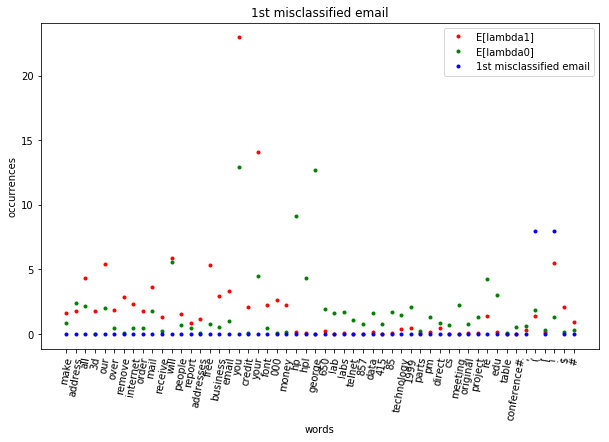

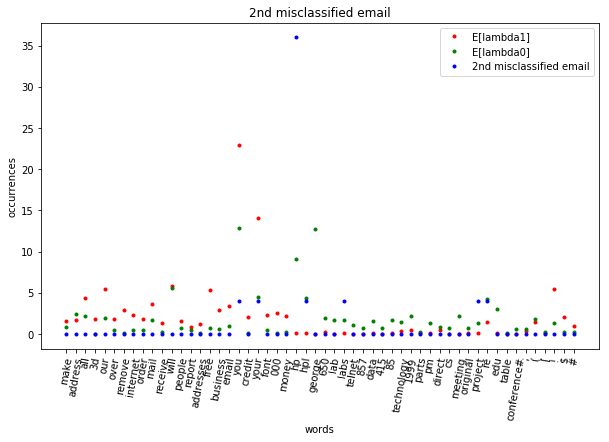

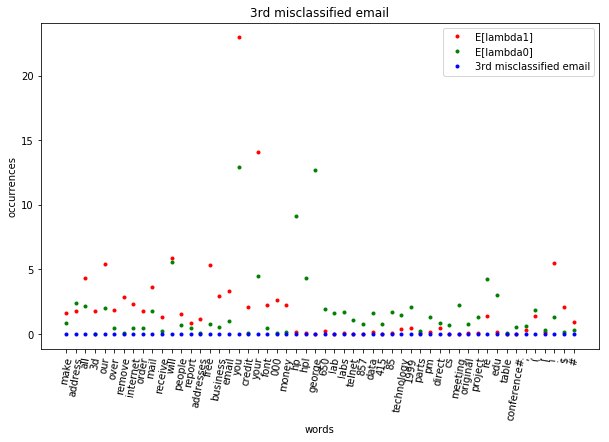

In [13]:
#p4.c misclassified-1
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[mis_index][0], 'b.', label="1st misclassified email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("1st misclassified email")
plt.legend()
plt.show()

#p4.c misclassified-2
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[mis_index][1], 'b.', label="2nd misclassified email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("2nd misclassified email")
plt.legend()
plt.show()

#p4.c misclassified-3
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[mis_index][2], 'b.', label="3rd misclassified email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("3rd misclassified email")
plt.legend()
plt.show()


In [14]:
ind_amb = abs(np.array(prob1) - np.array(prob0))
ind_amb[np.isnan(ind_amb)]=1

amb1_index=np.where(ind_amb == ind_amb.min())
ind_amb[np.where(ind_amb == ind_amb.min())] = 1
amb2_index=np.where(ind_amb == ind_amb.min())
ind_amb[np.where(ind_amb == ind_amb.min())] = 1
amb3_index=np.where(ind_amb == ind_amb.min())

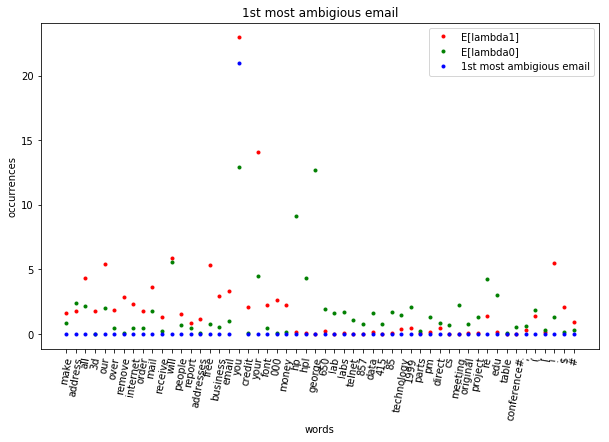

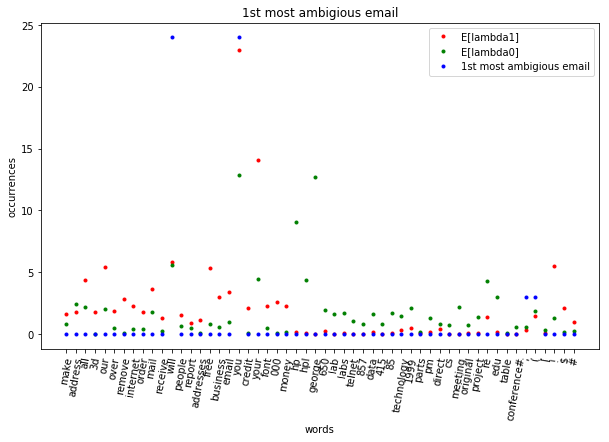

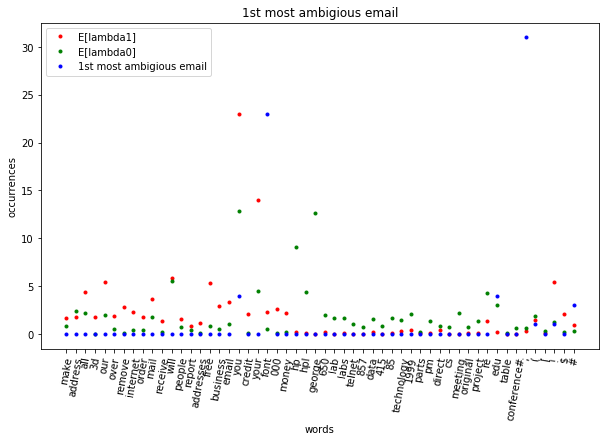

In [15]:
#p4.d most ambigious-1
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[amb1_index][0], 'b.', label="1st most ambigious email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("1st most ambigious email")
plt.legend()
plt.show()

#p4.d most ambigious-2
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[amb2_index][0], 'b.', label="2nd most ambigious email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("2nd most ambigious email")
plt.legend()
plt.show()

#p4.d most ambigious-3
plt.figure(figsize=(10,6))
plt.xticks(range(d), namesX)
plt.xticks(rotation=80)
plt.plot(range(d), E_lambda1, 'r.', label="E[lambda1]")
plt.plot(range(d), E_lambda0, 'g.', label="E[lambda0]")
plt.plot(range(d), testX[amb3_index][0], 'b.', label="3rd most ambigious email")
plt.xlabel("words")
plt.ylabel("occurrences")
plt.title("3rd most ambigious email")
plt.legend()
plt.show()